# Volume 3: Metropolis
    Jane Slagle
    Section 1 whoot whoot
    1/24/23

In [1]:
import numpy as np
from scipy import stats
from matplotlib import pyplot as plt
from math import sqrt, exp, log
import seaborn as sbn

## Problem 1

Write a function that uses the Metropolis hastings algorithm to draw from the posterior distribution over the mean $\mu$ and variance $\sigma ^2$. Use the given functions and algorithm 1.1 to complete the problem.

Your function should return an array of draws, an array of the log probabilities, and an acceptance rate. 
Using the seaborn.kdeplot function, plot the first 500 log probabilitis, the $\mu$ samples and posterior distribution, and the $\sigma ^2$ samples and posterior distribution. 

(Hint: When checking your acceptance, remember you are in log space.)

Compare your results with Fig 1.1 and 1.2

In [2]:
def proposal(x,s):
    """The proposal function Q(x,y) = N(x|y,sI)."""
    return stats.multivariate_normal.rvs(mean=x, cov=s*np.eye(len(x)))

In [3]:
def propLogDensity(x):
    """Calculate the log of the proportional density."""
    logprob = muprior.logpdf(x[0]) + sig2prior.logpdf(x[1])
    logprob += stats.norm.logpdf(scores, loc=x[0], scale=np.sqrt(x[1])).sum()
    return logprob    # ^this is where the scores are used.

In [4]:
def acceptance(x, y):
    return min(0, propLogDensity(x) - propLogDensity(y))

In [5]:
def metropolis(y0, s, n_samples):
    """Use the Metropolis algorithm to sample from posterior.
    Parameters:
     y0 ((2,) ndarray): The first entry is mu, the second entry is sigma^2.
     s (float): The standard deviation parameter for the proposal function.
     n_samples (int): The number of samples to generate.
   
   Returns:
     draws ((n_samples, 2) ndarray): The MCMC samples.
     logprobs ((n_samples,) ndarray): The log density of the samples.
     accept_rate (float): The proportion of accepted proposed samples."""
    #follow pseudo code given for Metroplois Hastings algorithm in lab manual:
    
    y = [y0]  #list of y vals stores all samples (all pts drawn) in it, put y0 bc y0 guess is our 1st samp pt
    
    #in this for loop: y_t-1 is the same as y[-1] bc keep on appending pts onto y so the t_1th pt is last pt everytime
    samps_accep = 0                             #counter to keep track of how many samples accepted
    for t in range(n_samples):                  
        x = proposal(y[-1], s)                  #draw x from distrib. Q, distrib. Q is propsal func
        a = np.random.uniform(0, 1)             #draw a from unif(0,1)
        
        if np.log(a) <= acceptance(x, y[-1]):  #using log(a), log(A) here, log(A) given by acceptance func 
            y.append(x)
            samps_accep += 1                    #if enter this if statement: means accepted the sample
        else:
            y.append(y[t-1])
    
    #find log density of each sample: call proplogdensity on indiv. pts in y
    logprobs = [propLogDensity(y[i]) for i in range(len(y))]
    
    accept_rate = samps_accep / len(y)  #acceptance rate is portion of samples accepted/total # samps
    
    #returning 3 things: 1)list of all pts drawn 2)call proplogdensity on y list 3)portion of samples accepted
    return np.array(y), logprobs, accept_rate

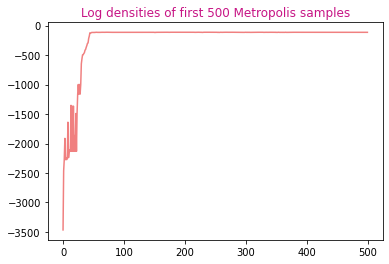

In [6]:
#test prob 1:

#load in the data and initialize hyperparameters
scores = np.load("examscores.npy")

#prior sigma^2 ~ IG(alpha, beta)
alpha = 3
beta = 50

#prior mu ~ N(m, s)
m = 80
s = 4

#initialize the prior distributions
muprior = stats.norm(loc=m, scale=sqrt(s**2))
sig2prior = stats.invgamma(alpha, scale=beta)

#want plot 1st 500 log prob so need to call prob 1 to get them!
y, logs, rates = metropolis(np.array([40, 10]), 20, 1000)  #only want logprobs
plt.title("Log densities of first 500 Metropolis samples", color = "mediumvioletred")
plt.plot(np.arange(500), logs[:500], color = "lightcoral")  #only want plot the 1st 500 logprobs
plt.show()

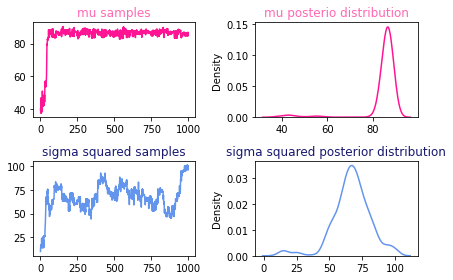

In [7]:
#want plot mu samples + mu posterior distribution, sigma_squared samples + sigma_squared distribution
#so will have 4 subplots for each:

plt.subplot(2, 2, 1)
plt.title("mu samples", color = "hotpink")
plt.plot(y[:,0], color = "deeppink")       #y[:,0] is mu samples bc told 1st entry of y is mu

plt.subplot(2, 2, 2)
plt.title("mu posterio distribution", color = "hotpink")
sbn.kdeplot(y[:,0],color = "deeppink")     #doing seaborn.kdeplot gives posterior distrib.

plt.subplot(2, 2, 3)    
plt.title("sigma squared samples", color = "midnightblue")
plt.plot(y[:,1], color = "cornflowerblue") #y[:,1] is sig^2 samples bc told 2nd entry of y is sig^2

plt.subplot(2, 2, 4)
plt.title("sigma squared posterior distribution", color = "midnightblue")
sbn.kdeplot(y[:,1], color = "cornflowerblue")

plt.tight_layout()
plt.show()

## Problem 2

Write a function that accepts a spin configuration $\sigma$ for a lattice as a NumPy array.
Compute the energy $H(\sigma)$ of the spin configuration.
Be careful to not double count site pair interactions!

In [8]:
def random_lattice(n):
    """Construct a random spin configuration for an nxn lattice."""
    random_spin = np.zeros((n,n))
    for k in range(n):
        random_spin[k,:] = 2*np.random.binomial(1,.5, n) -1
    return random_spin

In [9]:
def lattice_energy(L):
    """Computer the energy of the spin configuration corresponding to the
    lattice L.
    Parameter:
     L (ndarray): A lattice that we want the spin configuration for.
    
    Returns:
     (float): The spinfiguration of the lattice.
    """
    #energy H(sig) formula (which is what we want to find) given in lab manual, told J always -1
    #in the lattice/matrix L: want to multiply all values that are right next to eachother in each col/row
    #so multiply all values and then add them together. np.roll shifts it, we are shifting by factor of 1 here
    #so that are multiply L by each next entry just how want to!
    
    spin_energy = -np.sum((L*np.roll(L,1,axis=0))+(L*np.roll(L,1,axis=1)))
    
    return spin_energy

In [10]:
#test prob 2:

#want consider lattice that is 100x100 grid
#rep. spin configuration as 100x100 array w/ entries +=1 so that is why define A as below:
A = np.ones((100,100))
print(lattice_energy(A))

-20000.0


## Problem 3

Write a function that accepts an integer $n$ and chooses a pair of indices $(i,j)$ where $0 \le i,j \le n-1$.
Each possible pair should have an equal probability $\frac{1}{n^2}$ of being chosen.

In [11]:
def flip_location(n):
    """Choose a random pair of indices 0 <= i,j <= n-1.
    Parameter:
     n (int): 1/(n^2) probability for each location
     
    Returns:
     (index1, index2) (tuple): the tuple pair of the chosen indices. 
    """
    #get tuple of random numbers, want both numbers in the tuple to be less than n

    return ((np.random.randint(0,n)), np.random.randint(0,n)) 

In [12]:
#test prob 3: see if get a random pair of indices where each # in the pair is less than n inputted into func
flip_location(3)

(1, 1)

## Problem 4

Write a function that accepts a spin configuration $\sigma$, its energy $H(\sigma)$, and integer indices $i$ and $j$.
Compute the energy of the new spin configuration $\sigma^*$, which is $\sigma$ but with the spin flipped at the $(i,j)$th entry of the corresponding lattice.
Do not explicitly construct the new lattice for $\sigma^*$.

In [13]:
def updated_energy(L, L_energy, i, j):
    """Compute the energy of the spin configuration that results
    when the (i,j)th spin of L is flipped.
    
    Parameters:
     L (ndarray): the spin configuration 
     L_energy (float): the energy of the spin configuration.
     i (int): the first index.
     j (int): the second index.
    Returns:
     (float): the energy of the new updated lattice
    """
    n, n = L.shape
    
    #NOTE: flip 1 pixel: changes 4 relationships of the pixels around it
    #need to get sum of all adjacent pairs when you're flipping the pair you're at
    #i,j = indices that are being swapped, not iterating through them, i and j are set index values
    #L[i,j] is pair you're at and surrounding below is the 4 around the pair flipping
    #use % bc of how you have to loop around if you're on the edge
    
    H =  L_energy + 2*np.sum(L[i, j] * to_flip for to_flip in [L[i, (j+1)%n],
                                                               L[i, (j-1)%n],
                                                               L[(i+1)%n, j],
                                                               L[(i-1)%n, j]])
    return H

In [14]:
#will test this problem in problem 6

## Problem 5

Write a function that accepts a float $\beta$ and spin configuration energies $H(\sigma)$ and $H(\sigma^*)$.
Calculate whether or not the new spin configuration $\sigma^*$ should be accepted (return `True` or `False`).

(Hint: np.random.binomial() might be useful function)

In [15]:
def accept(beta, energy_old, energy_new):
    """Accept or reject the new spin configuration.
    
    Parameters:
     beta (float): a quantity inversly proportional to the temperature.
     energy_old (float): the energy of the old lattice.
     energy_new (float): the energy of the updated lattice.
     
    Returns:
     (boolean): whether the new energy should be accepted or not
    """
    #use eq. 18.1 to calc. whether or not new spin configuration should be accepted (True) or rejected (False)
    
    #accept w/ the if statements
    #first check the 2 cases when it is accepted, 1st one is when acceptance rate is 1
    if energy_new < energy_old:  #this is condition when acceptance rate is 1
        return True
    
    #check 2nd condt for when to accept, this is other 1 esides when acceptance rate is 1, the complicated one
    #from prob 1: we took log of both sides, used np.uniform in MH algorithm to rep. this other condt.
    if np.log(np.random.uniform()) < beta*(energy_old - energy_new): 
        return True
    
    #want to reject here
    else:
        return False

## Problem 6

Write a function that accepts a float $\beta>0$ and integers $n$, `n_samples`, and `burn_in`.
Initialize an $n\times n$ lattice for a spin configuration $\sigma$ using `random_lattice()`.
Use the Metropolis algorithm to (potentially) update the lattice `burn_in` times.
1. Use `flip_location()` to choose a site for possibly flipping the spin, thus defining a potential new configuration $\sigma^*$.
2. Use `updated_energy()` to calculate the energy $H(\sigma^*)$ of the proposed configuration.
3. Use `accept()` to accept or reject the proposed configuration. If it is accepted, set $\sigma = \sigma^*$ by flipping the spin at the indicated site.
4. Track $-\beta H(\sigma)$ at each iteration (independent of acceptance).

After the burn-in period, continue the iteration `n_samples` times, also recording every $100$th sample (to prevent memory failure).
Return the samples, the sequence of weighted energies $-\beta H(\sigma)$, and the acceptance rate.

Test your sampler on a $100 \times 100$ grid with $200000$ total iterations, with `n_samples` large enough so that you will keep $50$ samples, for $\beta = 0.2, 0.4, 1$.
Plot the proportional log probabilities, as well as a late sample from each test.


In [16]:
def ising_metropolis(beta, n=100, n_samples=5000, burn_in=195000):
    """Use the Metropolis algorithm to choose new spin configurations.

    Parameters:
        beta (float > 0): Constant inversely proportional to the temperature.
        N (int > 0): The size of the lattice.
        n_samples (int): The number of samples to generate.
        burnin (int): The number of iterations to burn before sampling.

    Returns:
        ((n_samples//100, n,n) ndarray): The sampled spin configurations.
        (n_samples) ndarray: The weighted energies of each configuration.
        (float): The proportion of proposed samples that were accepted.
    """
    #set up lists for the 3 things want to return:
    samp_spins = []
    energies = []
    accept_rate = 0   #this is counter variable bc want to get the propsed that were accepted
    
    #create nxn lattice for spin configuration w/ problem 2:
    L = random_lattice(n) 
    energy_old = lattice_energy(L)          #call it energy_old bc that is what call it in prob 5
    
    #loop through burn_in samples and number of samples:
    for val in range(n_samples + burn_in):  #want update lattice burn_in times, burn_in is all times loop
                                            #w/out reporting anything, takes time to get to correct interpret.
                                            #so that's what burn_in is for, then once get past that pt, are
                                            #at n_samples amounts of time
        
        #get the energies:
        energies.append(-beta*energy_old)   #told to track -beta*energy_old at each iteration (in step 4)
        i, j = flip_location(n)             #use prob 3 to choose site for possibly flipping spin (step 1)
        energy_new = updated_energy(L, energy_old, i, j)  #use prob 4 to calc. new energy of proposed config.
        
        #check if want to accept or reject:
        acceptance = accept(beta, energy_old, energy_new) #use prob 5 to accept or reject proposed config.
        #if accepted: set old energy to equal new energy and flip spin @ indicated site
        if acceptance == True:
            L[i,j] *= -1                    #flip  spin by multiplying the pair by -1 
            energy_old = energy_new         #update the energy
        
        #now calculate the acceptance rate: update the counter
        if val >= burn_in:  #have this if statement bc only want find accept. rate after burn in period over
            accept_rate += int(acceptance) 
            
            #save the spins
            if val % 100 == 0:              #want record every 100th sample
                samp_spins.append(L)
    
    #want return proportion of proposed samples that were accepted:
    prop_accept = accept_rate/n_samples
    
    return samp_spins, energies, prop_accept

/tmp/ipykernel_3394/963155409.py:21: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  H =  L_energy + 2*np.sum(L[i, j] * to_flip for to_flip in [L[i, (j+1)%n],


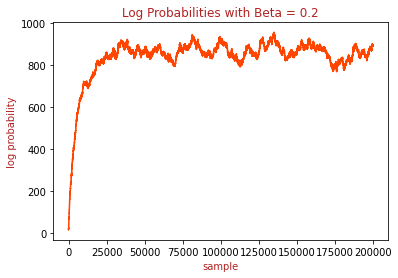

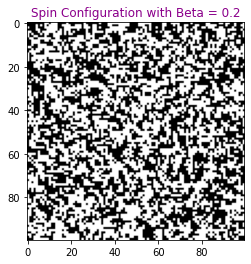

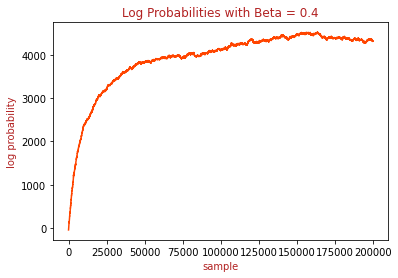

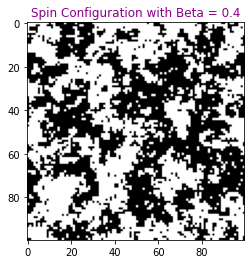

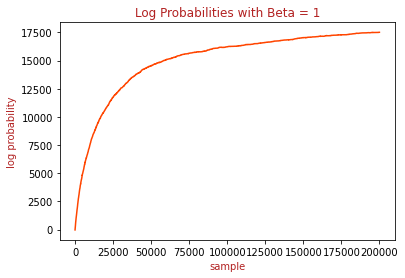

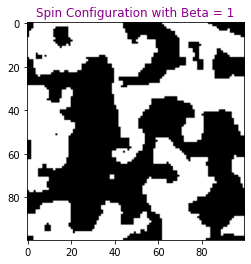

In [22]:
#test this problem:
beta_vals = [0.2, 0.4, 1]

#want test for each beta value:
for beta in beta_vals:
    #test sampler on 100x100 grid w/ 200000 total iterations w/ n_samples large enough so that keep 50 samples
    #for beta value, all of those values are default ones in func declaration except for the beta:
    samp_spins, energies, prop_accept = ising_metropolis(beta)
    
    #plot prop log prob, this is the 2nd thing returned in prob 6, so what I called energies
    plt.plot(energies, color = "orangered")
    plt.title("Log Probabilities with Beta = " + str(beta), color = "firebrick")
    plt.xlabel("sample", color = "firebrick")
    plt.ylabel("log probability", color = "firebrick")
    plt.show()
    
    #now show the spin configuration:
    plt.imshow(samp_spins[-1], cmap = "Greys")
    plt.title("Spin Configuration with Beta = " + str(beta), color = "darkmagenta")
    plt.show()